Name: Aparna Iyer

PRN: 22071026017

Batch: AI-ML A1, 2022-2026

###**Title: Markov Decision Process (MDP)**

In [ ]:
import numpy as np                    #Import NumPy for numerical computations
import gym                            #Importing the OpenAI Gymnasium Library for creating & interacting with the environment
from IPython import display           #Importing display module /display utilities for animations
from matplotlib import pyplot as plt  #Importing matplotlib for visualizations
from envs import Maze                 #From the envs Module, importing the Maze Environment
%matplotlib inline


/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Making the environment: Maze()




In [ ]:
env = Maze()  #env is an instance of the Maze class, imported from Gymnasium Library

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env.reset()   #State is restored to the initial state by calling the reset method of the Maze class

(0, 0)

In [ ]:
initial_state = env.reset()  #initial_state variable is set to the Initial State of the Agent

print(f"The new episode will start in state: {initial_state}")

The new episode will start in state: (0, 0)


env.render Method:

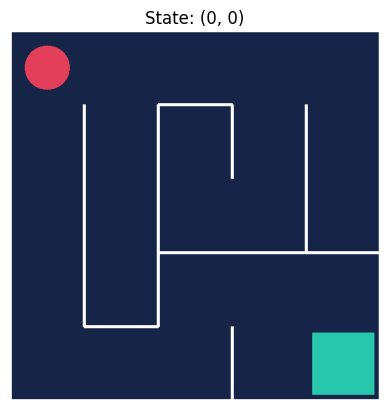

In [ ]:
frame = env.render(mode='rgb_array')  #Render the current state of the environment in the variable frame, which is displayed
plt.axis('off')                       #Turn off the axis to provide a clean visual representation
plt.title(f"State: {initial_state}")  #Add a title indicating the current state
plt.imshow(frame)                     #Display the rendered RGB frame as an image using Matplotlib

env.step() Method: Applies action selected by agent in the environment, to modify it.

In response, the environment returns a tuple of 4 objects:

1. The next state
2. The reward obtained
3. (bool) If the task has been completed (done)
4. Any other relevant information, in a Python Dictionary

In [ ]:
action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print(f"After moving down 1 row, the task is","" if done else "not","finished.")

After moving down 1 row, the agent is in state: (1, 0)
After moving down 1 row, we got a reward of: -1.0
After moving down 1 row, the task is not finished.


In [ ]:
action = 0
next_state, reward, done, info = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print(f"After moving down 1 row, the task is","" if done else "not","finished.")

After moving down 1 row, the agent is in state: (0, 0)
After moving down 1 row, we got a reward of: -1.0
After moving down 1 row, the task is not finished.


In [ ]:
#0: Up
#1: Right
#2: Down
#3: Left

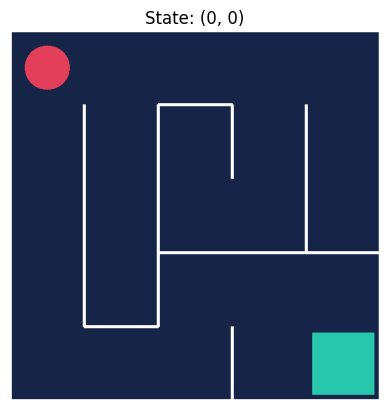

In [ ]:
frame = env.render(mode='rgb_array')  #Render the current state of the environment
plt.axis('off')                       #Turn off the axis to provide a clean visual representation
plt.title(f"State: {next_state}")     #Add a title indicating the current state
plt.imshow(frame)                     #Display the rendered RGB frame as an image using Matplotlib

In [ ]:
env.close()

States and State Space

s=(row,column)

row, column belong to {0,1,2,3,4}



In [ ]:
env = Maze()

print(f"For example, the initial state: {env.reset()}")
print(f"The space state is of type: {env.observation_space}") #Matrix Representation of environment (dimensions)
#Multidiscrete([5,5]): Multidimensional Representation of 5 rows and 5 columns (25 states)

For example, the initial state: (0, 0)
The space state is of type: MultiDiscrete([5 5])


Actions and Action Space - {0,1,2,3}

0 --> Move up

1 --> Move Right

2 --> Move Down

3 --> Move Left


In [ ]:
print(f"An example of a valid action is: {env.action_space.sample()}")   #One action is sampled randomly from the Action Space
print(f"The space action is of type: {env.action_space}")  #Number of actions, and type

An example of a valid action is: 1
The space action is of type: Discrete(4)


Episodes and Trajectories

Trajectory: Sequence generated by moving from one arbitrary state to another (both arbitrary)

Episode: Journey over time from initial to final state



In [ ]:
env = Maze()     #Instantiate Maze class as the object env
state = env.reset()  #Call the reset method of the Maze class, store the initial state in the 'state' variable
trajectory = []  #Initialized as an array, as it contains a series of actions
count=0
while not done:
  action = env.action_space.sample()  #Randomly sample an action from the environment
  next_state, reward, done, extra_info = env.step(action)
  trajectory.append([state,action,reward,done,next_state]) #Since it's a trajectory, we append the next state
  state = next_state
  count+=1
env.close()

print(f"Congrats! You just generated your first trajectory:\n{trajectory}")
print(f"Number of steps in this trajectory: {count}")

Congrats! You just generated your first trajectory:
[[(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 1, -1.0, False, (0, 3)], [(0, 3), 1, -1.0, False, (0, 4)], [(0, 4), 3, -1.0, False, (0, 3)], [(0, 3), 1, -1.0, False, (0, 4)], [(0, 4), 0, -1.0, False, (0, 4)], [(0, 4), 0, -1.0, False, (0, 4)], [(0, 4), 1, -1.0, False, (0, 4)], [(0, 4), 0, -1.0, False, (0, 4)], [(0, 4), 2, -1.0, False, (1, 4)], [(1, 4), 3, -1.0, False, (1, 4)], [(1, 4), 0, -1.0, False, (0, 4)], [(0, 4), 1, -1.0, False, (0, 4)], [(0, 4), 2, -1.0, False, (1, 4)], [(1, 4), 3, -1.0, False, (1, 4)], [(1, 4), 3, -1.0, False, (1, 4)], [(1, 4), 3, -1.0, False, (1, 4)], [(1, 4), 0, -1.0, False, (0, 4)], [(0, 4), 3, -1.0, False, (0, 3)], [(0, 3), 1, -1.0, False, (0, 4)], [(0, 4), 0, -1.0, False, (0, 4)], [(0, 4), 2, -1.0, False, (1, 

In [ ]:
env = Maze()     #Instantiate Maze class as the object env
state = env.reset()  #Call the reset method of the Maze class, store the initial state in the 'state' variable
trajectory = []  #Initialized as an array, as it contains a series of actions
count=0
for _ in range(3):#Iterate 3 times
  action = env.action_space.sample()
  next_state, reward, done, extra_info = env.step(action)
  trajectory.append([state,action,reward,done,next_state])  #Store the current state, action, reward, whether done or not, and next state.
  state = next_state  #Update the current state
  count+=1
env.close()

print(f"Congrats! You just generated your first trajectory:\n{trajectory}")
print(f"Number of steps in this trajectory: {count}")

Congrats! You just generated your first trajectory:
[[(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)]]
Number of steps in this trajectory: 3


In [ ]:
env = Maze()  #Creating an instance env, of Maze class
state = env.reset()
done = False
gamma = 0.99 #Discounting factor
G_0 = 0
t = 0

while not done:
  action = env.action_space.sample()
  _,reward,done,_ = env.step(action)
  G_0 += gamma**t * reward  #Cumulative Reward
  t+=1
env.close()

print(f"""It took us {t} moves to find the exit, and each reward r(s,a)=-1, so the return amounts to {G_0}.""")

It took us 220 moves to find the exit, and each reward r(s,a)=-1, so the return amounts to -89.04170944366506.


Episodes:



In [ ]:
#Episodes
env = Maze()

state = env.reset()

episode = []

done = False

while not done:
  action = env.action_space.sample() #Randomly sample an action from the state-space
  next_state, reward, done, extra_info = env.step(action)
  episode.append([state,action,reward,done,next_state])
  state = next_state
env.close()

print(f"Congrats! You just generated your first episode:\n {episode}")

Congrats! You just generated your first episode:
 [[(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 3, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 1, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 3, -1.0, False, (1, 1)], [(1, 1), 3, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 2, -1.0, False, (3, 1)], [(3, 1), 3, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 3, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 3, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)

Policy Algorithm

Rewards and Returns

Reward: Immediate Reward for a State Transition

Return: Cumulative Reward --> Gt (Over all transitions)

r = r(s,a)

In [ ]:
env=Maze()  #Instantiating Maze Class
state=env.reset()
action = env.action_space.sample()  #sampled action from Action Space (0,1,2,4)
_,reward,_,_= env.step(action) #step function/method with argument action
#next_state, reward, done, extra_info
print(f"We achieved a reward of {reward} by taking action {action} in state {state}")

We achieved a reward of -1.0 by taking action 0 in state (0, 0)


###Discount Factor:

Return, G0 = R1 + gamma*R2 + gamma^2*R3 +...gamma^(T-1)*RT

Depreciating Value

Stochasticity:

Gamma: Discount Factor : Hyperparameter

Anticipating future rewards.

Giving lesser importance to future rewards.

Let's assume that Gamma = 0.99.

(Standard Gamma: 0.7 to 0.99)

Myopic: Gamma approaches 0

Far-sighted: Gamma approaches 1 (0.99)

In [ ]:
env = Maze()
state = env.reset()
done = False
gamma = 0.99
G_0 = 0 #Set Return to 0
t=0
while not done:
  action = env.action_space.sample()
  _,reward,done,_ = env.step(action) #Value of done is retrieved from here
  G_0 += gamma ** t * reward   #Bellman Equation (Formula for Return)
  t +=1  #Incrementing a counter t, to determine number of time-steps

env.close()
print(
    f"""It took us {t} moves to find the exit, and each reward r(s,a)=-1, so the return amounts to {G_0}."""
)

It took us 178 moves to find the exit, and each reward r(s,a)=-1, so the return amounts to -83.28660649851152.


###Policy
How the agent strategizes its actions.

Based on the current state.

Policy decides the behaviour of the agent, while interacting with the environment and achieving its goal.

Playing an episode with our random policy.

Create and reset the environment.

In [ ]:
env = Maze()

state = env.reset()

def random_policy(state):
  return np.array([0.25]*4)  #Number of Actions = 4


Compute p(a|s) for all a belonging to {0,1,2,3}


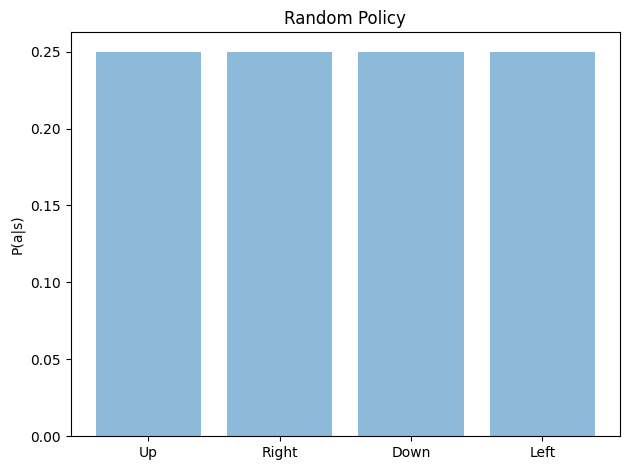

In [ ]:
action_probabilities = random_policy(state)

objects = ('Up','Right','Down','Left') #Tuple

y_pos = np.arange(len(objects)) #Array with 0,1,2,3

plt.bar(y_pos, action_probabilities, align='center', alpha=0.5) #Alpha: Opaqueness

plt.xticks(y_pos, objects) #Objects: Up, Right, Down, Left

plt.ylabel('P(a|s)')

plt.title('Random Policy')

plt.tight_layout()

Use the policy to play the entire episode

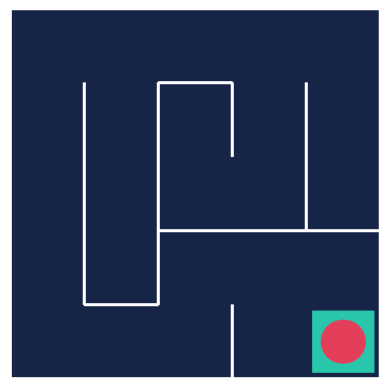

In [ ]:
env.reset()  #Call the reset method for the instance

done = False

img = plt.imshow(env.render(mode='rgb_array'))

#Loop until the episode ends

while not done:
  action = np.random.choice(range(4),1,p=action_probabilities)  #Range: 0,1,2,4; 1 action, with probability belonging to action_probabilities
  _,_,done,_ = env.step(action)  #store a list
  img.set_data(env.render(mode='rgb_array'))  #implement the render() method from envs.py
  plt.axis('off')  #Turn off axes display
  display.display(plt.gcf()) #Display moving graphics (motion) in current output cell
  display.clear_output(wait=True) #Clear previous output to create an animation effect
env.close()

Render the New State

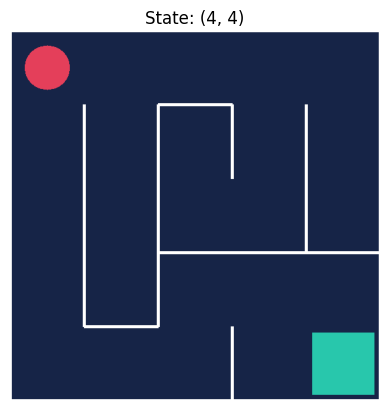

In [ ]:
frame = env.render(mode='rgb_array')

plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

#s- State, p- Probability